<a href="https://colab.research.google.com/github/GallardoCarmen/Mineria_Datos/blob/main/LAB02_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ufv.es/wp-content/uploads/2023/03/logo-UFV-scaled.jpg" alt="Logo de Colab" width="200">

# <font color='00008B'>GRUPO 02.</font>
##### Laura Lirón Carrión, Carmen Gallardo Martín, David Marín Sala y Nuria Prol Vecoña.

# <font color='00008B'>LABORATORIO 2.</font>


# **Práctica 1 (reglas de Asociación)**


Usa la librería mlxtend que nos permita solucionar todos los problemas relacionados con las reglas de
asociación. Para ello tendremos que usar el algoritmo Apriori y una serie de métodos para obtener la distinta
información que este genera.

I) (5 puntos) Usaremos la librería con el Dataset Market_Basket_Optimisation.csv que se ha proporcionado.

Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación. (1 punto)

¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos (1 punto)

¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué? (1 punto)

Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas
usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.
(1 punto)

Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna
manera como se comportan los clientes del supermercado? (1 punto)

Para obtener los datos pedidos anteriormente, se hará uso de la librería de la siguiente manera:

1) Empezaremos obteniendo los itemsets frecuentes para k=1. En este punto necesitaremos obtener el
soporte de los itemset. Por lo tanto, se tendrá que usar un método que dado un itemset devuelva su
soporte.

2) A partir de k=2.
a. Mostrar los itemset frecuentes candidatos y su soporte.

3) Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes.


4) Mostrar todas las posibles reglas con la confianza de cada una de ellas.

5) Listar todas las reglas que sean de alta confianza.

6) Usar los siguientes métodos. Dado un antecesor, devolver todas las reglas que contengan a dicho
antecesor. Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

7) Utiliza al menos dos representaciones gráficas para representar las reglas obtenidas e interpretar los
datos.

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**1. Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.**

En primer lugar, desarrollamos una función llamada 'calcular_itemsets_frecuentes' que implementa el algoritmo Apriori. Hemos creado esta función con la intención de buscar flexibilidad y permitir la exploración de diversas configuraciones del algoritmo. Al desarrollar el algoritmo dentro de una función, tenemos la capacidad de ajustar los parámetros de entrada, como el soporte mínimo y la métrica de interés, sin necesidad de reescribir el código para cada prueba.

In [2]:
def calcular_itemsets_frecuentes(df, transactions, soporte, metrica):

    # Calculamos el soporte de los itemsets para k=1 (ítems individuales).
    # Esto lo hacemos simplemente sumando cada columna (que representa un ítem) y dividiendo por el número total de transacciones.
    support_k1 = df.sum() / len(transactions)


    # Filtramos itemsets por un umbral mínimo de soporte.
    min_support = soporte
    frequent_itemsets_k1 = support_k1[support_k1 >= min_support].sort_values(ascending=False)

    print(f"Itemsets frecuentes para k=1 y su soporte:")
    print(frequent_itemsets_k1)

    # Continuamos desde k=2 como indicamos.
    k = 2

    # Inicializamos una lista para almacenar todos los itemsets frecuentes.
    all_frequent_itemsets = []

    while True:

        # Encontramos todos los itemsets frecuentes hasta la longitud máxima k.
        frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

        # Filtramos específicamente los itemsets de longitud k.
        frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
        frequent_itemsets_k = frequent_itemsets[frequent_itemsets['length'] == k]

        # Si no encontramos itemsets frecuentes de longitud k, salimos del bucle.
        if frequent_itemsets_k.shape[0] == 0:

            print(f"No encontramos más itemsets frecuentes para k={k}. Proceso terminado.")
            break

        # Mostramos los itemsets frecuentes de longitud k y su soporte.
        print(f"Itemsets frecuentes para k={k} y su soporte:")
        print(frequent_itemsets_k[['itemsets', 'support']])

        # Agregamos los itemsets frecuentes de este nivel a la lista de todos los itemsets frecuentes.
        all_frequent_itemsets.extend(frequent_itemsets_k.values.tolist())

        # Incrementamos k para buscar itemsets de mayor longitud en la próxima iteración.
        k += 1

    # Asumiendo que 'frequent_itemsets' es nuestro DataFrame de itemsets frecuentes obtenidos con apriori.
    rules = association_rules(frequent_itemsets, metric=metrica, min_threshold=0.1)  # Ajustamos el umbral de confianza según sea necesario.

    # Mostramos las reglas de asociación con sus métricas.
    print("Reglas obtenidas:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

    # Mostramos las reglas de alta confianza.
    high_confidence_rules = rules[rules['confidence'] >= 0.3]
    print(high_confidence_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

    return high_confidence_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **Método Empleado.**

Una vez tenemos la función que implementa el algoritmo y antes de comenzar a programar el resto, vamos a entrar más en detalle en el proceso que hemos seguido para afrontar el problema propuesto.

El proceso que hemos seguido está basado en el método **CRISP-DM** (Cross-Industry Standard Process for Data Mining), el cual es un enfoque estructurado y sistemático para el análisis de datos que garantiza la alineación de los esfuerzos analíticos con los objetivos empresariales. Dicho método, sigue una serie de pasos que expondremos relacionandolo con nuestro problema:

* **Comprensión del Negocio**: en esta fase se establece la base del proyecto. Tratamos de identificar claramente el problema que queremos resolver y los objetivos de negocio que esperamos alcanzar con nuestro análisis. en nuestro caso, el objetivo es mejorar la retención de clientes analizando patrones de compra.

* **Comprensión de los Datos**:  tratamos de familiarizarnos con los datos disponibles para entender mejor qué información podemos extraer. En nuestro proyecto, por ejemplo, analizamos las tendencias de compra y la frecuencia de uso de nuestros clientes para identificar indicadores clave de fidelidad.

* **Preparación de los Datos**: esta etapa implica todas las tareas necesarias para construir el conjunto de datos final que se utilizará para el modelado. Limpiamos y preprocesamos los datos, seleccionamos variables importantes y transformamos datos cuando fue necesario.

* **Modelado**: con los datos preparados, procedemos a seleccionar y aplicar técnicas de modelado estadístico y de machine learning. En nuestro caso, el Algoritmo Apriori.

* **Evaluación**: procedemos a evaluar el desempeño del modelo para asegurarnos de que cumple con los objetivos empresariales.


Ya definidos los pasos a seguir para poder realizar un proyecto coherente y organizado, comenzamos a aplicar el algoritmo Apriori.

#### **Carga de Datos y Configuración Inicial del Algoritmo.**

Para comenzar, cargamos la base de datos y convertimos el dataframe de esta en una lista de lista para poder aplicar el algoritmo de análisis. El TransactionEncoder, es un paso de preparación de datos que convierte la lista de listas en un formato adecuado para la minería de reglas de asociación, creando un conjunto de datos 'one-hot encoded'.

Una vez los datos estan preparados, establecemos el soporte y la métrica que utilizaremos para identificar los ítems frecuentes. El soporte se define como un array de tres posibles valores: 0.05, 0.01 y 0.005, lo que nos permitirá experimentar con distintos umbrales de frecuencia además, cabe destacar que la métrica seleccionada es la "confianza".

Para comenzar, aplicamos una primera configuración de soporte del 5% y la métrica de confianza para calcular los ítems frecuentes.

In [3]:
# Cargar el dataset.
file_path = 'Market_Basket_Optimisation.csv'  # Asegúrate de que la ruta al archivo sea correcta.
data = pd.read_csv(file_path, header=None)

# Convertir el dataframe a una lista de listas.
transactions = data.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

print(transactions)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Definir el soporte y la métrica.
soporte = [0.05, 0.01, 0.005]
metrica = "confidence"

reglas05 =calcular_itemsets_frecuentes(df, transactions, soporte[0], metrica)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Utilizando un soporte del 5%, hemos podido identificar ciertos patrones de compra recurrentes en el conjunto de datos. Entre los ítems más frecuentes, destacan productos como el chocolate, agua mineral, huevos y spaghetti, esto sugiere que dichos productos son comúnmente seleccionados por los clientes, posiblemente debido a su uso casi diario.

Además, al observar las reglas de asociación obtenidas, podemos ver que existe una relación significativa entre la compra de agua mineral y otros productos. Por ejemplo, las reglas indican que los clientes que compran chocolate tienden a comprar también agua mineral, con una confianza superior al 32%. Esta tendencia también se observa con productos como los huevos y el spaghetti. Además, el valor de lift superior a 1 en todas las reglas indica que la probabilidad de que estos productos se compren juntos es mayor que la probabilidad de que se compren por separado, lo que refuerza la idea de una asociación positiva entre ellos.

También cabe destacar que no se encontraron ítems frecuentes para configuraciones con k=3, lo que sugiere que combinaciones de tres productos con un soporte del 5% no son comunes. Esta conclusión refuerza nuestra intención de dar importancia de considerar distintos niveles de soporte para entender mejor la dinámica de compra.

#### **Otras Configuraciones Del Algoritmo.**

En este paso, como se nos pide en el enunciado, probaremos con dos configuraciones diferentes con el objetivo de tratar de encontrar la óptima.
Probaremos variando la frecuencia bajándola a 0.01 y a 0.005.


In [4]:
reglas01 =calcular_itemsets_frecuentes(df, transactions, soporte[1], metrica)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Itemsets frecuentes para k=1 y su soporte:
mineral water     0.238368
eggs              0.179709
spaghetti         0.174110
french fries      0.170911
chocolate         0.163845
                    ...   
yams              0.011465
magazines         0.010932
barbecue sauce    0.010799
cider             0.010532
nonfat milk       0.010399
Length: 75, dtype: float64
Itemsets frecuentes para k=2 y su soporte:
                          itemsets   support
75        (mineral water, avocado)  0.011598
76                 (burgers, cake)  0.011465
77            (chocolate, burgers)  0.017064
78                 (eggs, burgers)  0.028796
79         (french fries, burgers)  0.021997
..                             ...       ...
235             (shrimp, tomatoes)  0.011199
236              (soup, spaghetti)  0.014265
237          (spaghetti, tomatoes)  0.020931
238            (spaghetti, turkey)  0.016531
239  (spaghetti, whole wheat rice)  0.014131

[165 rows x 2 columns]
Itemsets frecuentes para k

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [5]:
reglas005 =calcular_itemsets_frecuentes(df, transactions, soporte[2], metrica) #demasiadas reglas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Itemsets frecuentes para k=1 y su soporte:
mineral water       0.238368
eggs                0.179709
spaghetti           0.174110
french fries        0.170911
chocolate           0.163845
                      ...   
mayonnaise          0.006133
pickles             0.005999
burger sauce        0.005866
mint green tea      0.005599
hand protein bar    0.005199
Length: 101, dtype: float64
Itemsets frecuentes para k=2 y su soporte:
                           itemsets   support
101              (burgers, almonds)  0.005199
102            (chocolate, almonds)  0.005999
103                 (eggs, almonds)  0.006532
104            (green tea, almonds)  0.005066
105                 (milk, almonds)  0.005199
..                              ...       ...
547  (whole wheat pasta, spaghetti)  0.008799
548   (spaghetti, whole wheat rice)  0.014131
549              (tomatoes, turkey)  0.006532
550    (whole wheat rice, tomatoes)  0.005999
551      (whole wheat rice, turkey)  0.007066

[451 rows x 2 

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Itemsets frecuentes para k=3 y su soporte:
                                         itemsets   support
552                    (chocolate, eggs, burgers)  0.005466
553                    (chocolate, milk, burgers)  0.005466
554           (mineral water, chocolate, burgers)  0.005733
555               (chocolate, spaghetti, burgers)  0.006399
556                 (french fries, eggs, burgers)  0.009065
..                                            ...       ...
720              (mineral water, soup, spaghetti)  0.007466
721          (mineral water, spaghetti, tomatoes)  0.009332
722            (mineral water, spaghetti, turkey)  0.006399
723  (mineral water, spaghetti, whole wheat rice)  0.006266
724              (spaghetti, pancakes, olive oil)  0.005066

[173 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


No encontramos más itemsets frecuentes para k=4. Proceso terminado.
Reglas obtenidas:
                        antecedents                 consequents   support  \
0                         (almonds)                   (burgers)  0.005199   
1                         (almonds)                 (chocolate)  0.005999   
2                         (almonds)                      (eggs)  0.006532   
3                         (almonds)                 (green tea)  0.005066   
4                         (almonds)                      (milk)  0.005199   
...                             ...                         ...       ...   
1098  (spaghetti, whole wheat rice)             (mineral water)  0.006266   
1099             (whole wheat rice)  (mineral water, spaghetti)  0.006266   
1100          (spaghetti, pancakes)                 (olive oil)  0.005066   
1101         (spaghetti, olive oil)                  (pancakes)  0.005066   
1102          (pancakes, olive oil)                 (spaghetti)  0.

#### **Comparación De Las Configuraciones.**

Tras analizar los resultados arrojados por el Algoritmo Apriori, tenemos que hacer hacer la labor de comparar y valorar su funcionamiento según que configuración tenga.

* **Soporte del 5%**: en este nivel de soporte, se han generado 6 reglas. Esta cantidad refleja un nivel alto de soporte que nos proporciona reglas con ítems muy frecuentes. Como ya se ha mencionado anteriormente, las reglas obtenidas indican una fuerte asociación entre productos como el agua mineral y alimentos básicos como chocolate, huevos y spaghetti.

* **Soporte del 1%**: observamos un aumento en el número de reglas generadas, lo que indica un menor porcentaje de confianza en las asociaciones. Con esta configuración, la cantidad de reglas asciende a 320, dándonos patrones de compra más diversificados.Además, en este nivel de frecuencia, el algoritmo llega a k = 3 creando nuevas reglas que relacionan 3 alimentos distintos. Aquí, empezamos a ver reglas que involucran combinaciones más específicas de productos, como por ejemplo, agua mineral y whole wheat rice, lo que podría sugerir patrones menos comunes como puede ser los hábitos de consumo orientados a la salud.

* **Soporte del 0.5%**: el número de reglas se incrementa notablemente, reflejando una amplia variedad de combinaciones de productos que se compran juntos, aunque con menor frecuencia. Se generaron 1103 reglas, lo que indica que estamos capturando relaciones entre ítems que son menos frecuentes pero aún ligeramente significativas. Al igual que con un soporte de 1%,  el algoritmo llega a k = 3 creando nuevas reglas que relacionan 3 alimentos distintos.

Desde el punto de vista más matemátio, reducir el soporte permite descubrir reglas que podrían pasar desapercibidas a niveles más altos de soporte. Sin embargo, esto también puede resultar en un gran número de reglas, muchas de las cuales pueden ser de menor importancia o más difíciles de interpretar.

Sin embargo, nuestro punto de vista tiene que ser empresarial y razonar con el objetivo de maximizar la rentabilidad de las normas que vayamos a poner en práctica. Con este punto de vista, es importante encontrar un equilibrio entre obtener suficientes reglas para cubrir diversos patrones de compra y garantizar que estas reglas sean lo suficientemente significativas como para implementar estrategias comerciales efectivas. Por ello, nos quedaremos con las configuraciones de un 5% y un 1%.

Un soporte del 5%, puede ser muy útil para identificar los principales impulsores de ventas y para centrarse en los productos más populares sin embargo, soporte del 1% ofrece una visión más detallada, permitiendo la identificación de oportunidades de ventas cruzadas.

El modelo con un soporte del 1% ofrece es ciertamente atractivo. Produce un número manejable de reglas que aún revelan patrones de compra menos obvios, sin ser excesivo. Este nivel puede ayudar a la empresa a identificar oportunidades específicas de ventas cruzadas y promociones dirigidas sin perderse en la complejidad de datos de menor importancia.

Resumiendo un poco, aunque el modelo con un soporte del 0.5% proporciona la visión más amplia de las asociaciones de productos, el modelo con un soporte del 1% por las razones que ya se han explicado, parece ser el mejor desde una perspectiva empresarial.

---------------------------------------------------------------

#### **HeatMap Del LIFT**

Crear un heatmap del lift para las reglas de asociación es una técnica para visualizar la fortaleza y la relevancia de las relaciones entre los ítems. Como ya se ha explicado, el lift es una medida de interés que compara la probabilidad de observar la ocurrencia conjunta de dos ítems con la probabilidad de observarlos por separado. Un valor mayor a 1 indica que los ítems se compran juntos más frecuentemente de lo que se esperaría si fueran independientes.

El uso de un heatmap facilita la identificación rápida de las relaciones más fuertes. Los colores más intensos (como el rojo) en la representación representan valores más altos de lift, mientras que los colores menos intensos (como el amarillo) representan valores más bajos. Esta representación visual nos permite a los analistas y a los responsables de tomar decisiones empresariales comprender rápidamente qué combinaciones de productos son más propensas a ser compradas conjuntamente. Estos es indispensable para la planificacion de campañas de marketing, ofertas o la disposición de dichos conjuntos de alimentos en el establecimiento.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


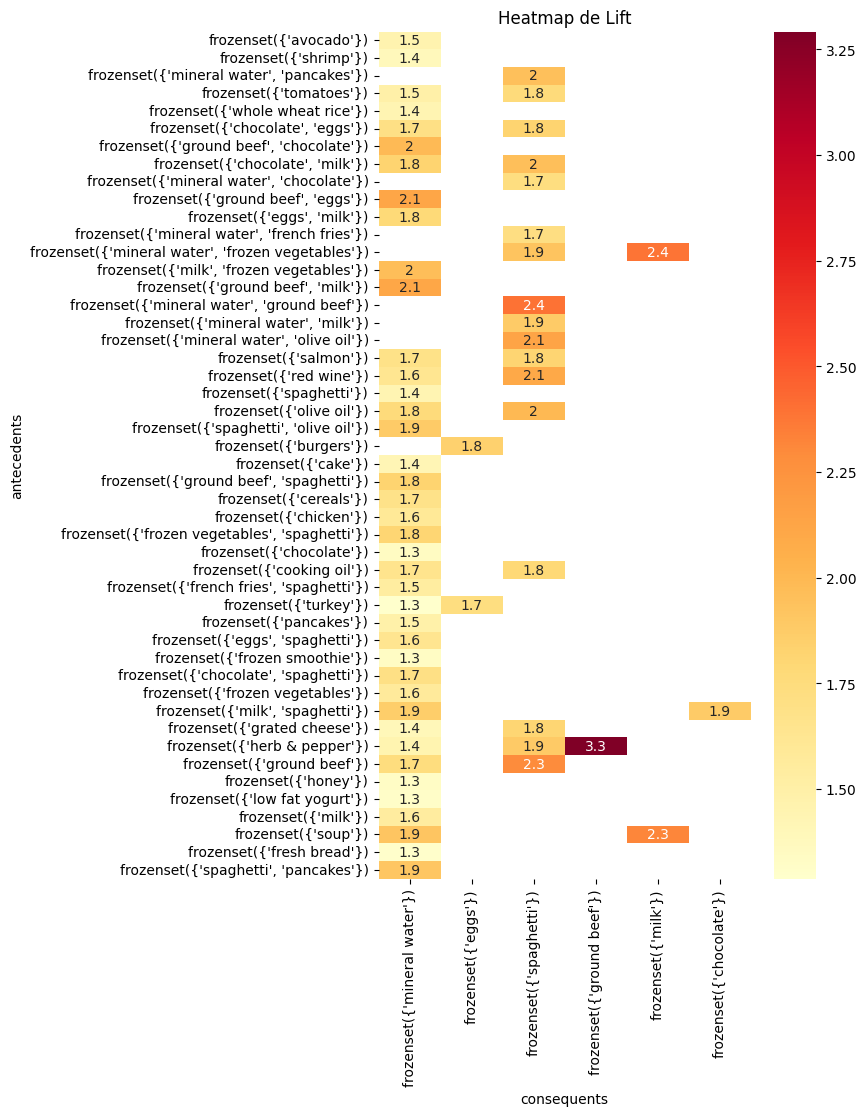

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'reglas01' es tu DataFrame.
pivot = reglas01.pivot(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(6, 11))
sns.heatmap(pivot, annot=True, cmap='YlOrRd')
plt.title('Heatmap de Lift')
plt.show()

Al analizar el heatmap del lift, observamos una gran presencia del agua mineral, que aparece en combinación con una variedad de productos. Esto resalta su importancia como un ítem importante en la cesta de compras del consumidor, lo que podría ser un indicador para asegurar su disponibilidad constante y considerar su uso en promociones.

Una relación que nos llama la antencón es la aquella entre hierbas, pimienta y carne, que, aunque es menos frecuente, resulta ser particularmente fuerte. Esto sugiere una oportunidad de marketing específica para promociones o colocación de productos relacionados con recetas o comidas que involucren estos ingredientes. Por ejemplo, se podrían crear packs conjuntos o promociones enfocadas en ingredientes para carnes, lo cual podría aumentar la venta de estos productos que se asocian fuertemente con la preparación de platos de carne.

##### **Respresentación Gráfica de las Reglas de Asociación.**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


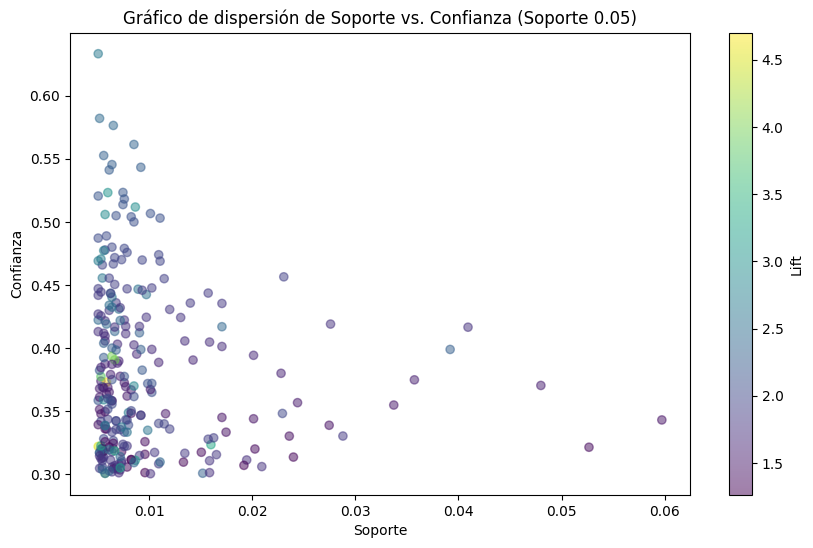

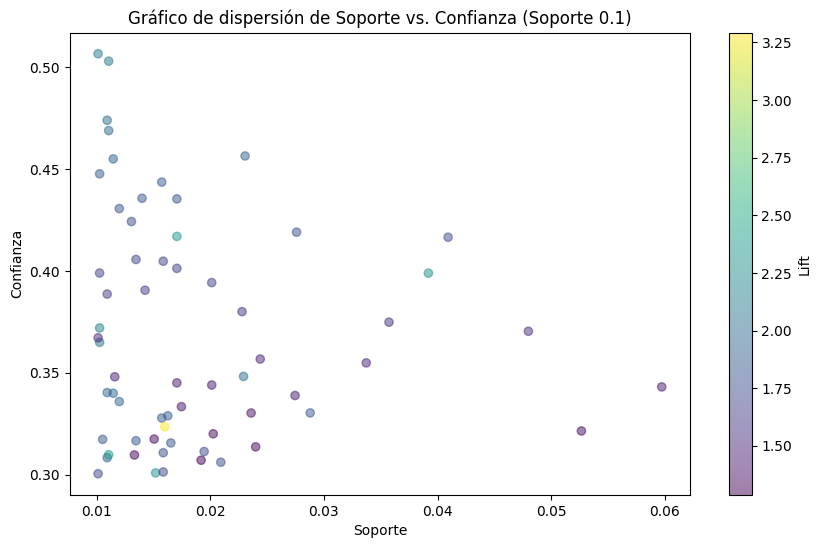

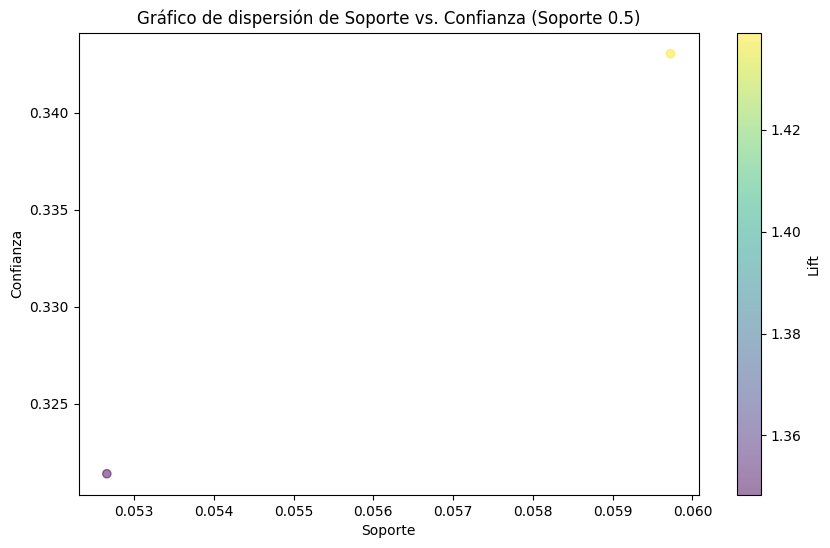

In [7]:
# Para reglas con soporte 0.05.
plt.figure(figsize=(10, 6))
plt.scatter(reglas005['support'], reglas005['confidence'], alpha=0.5, c=reglas005['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title('Gráfico de dispersión de Soporte vs. Confianza (Soporte 0.05)')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.show()

# Para reglas con soporte 0.1.
plt.figure(figsize=(10, 6))
plt.scatter(reglas01['support'], reglas01['confidence'], alpha=0.5, c=reglas01['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title('Gráfico de dispersión de Soporte vs. Confianza (Soporte 0.1)')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.show()

# Para reglas con soporte 0.5.
plt.figure(figsize=(10, 6))
plt.scatter(reglas05['support'], reglas05['confidence'], alpha=0.5, c=reglas05['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title('Gráfico de dispersión de Soporte vs. Confianza (Soporte 0.5)')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.show()

**¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos**

Al hacer el Algoritmo Apriori, emplear el soporte o la frecuencia llevan a las mismas conclusiones sobre los datos, principalmente porque la frecuencia es la base para calcular el soporte.

* **Frecuencia**: Es el número absoluto de veces que un conjunto de ítems aparece en el conjunto de datos. Es una métrica que no tiene en cuenta el tamaño total del conjunto de datos.

* **Soporte**: Es la proporción que representa la frecuencia de un conjunto de ítems con respecto al número total de transacciones o registros en el conjunto de datos.

Entonces, ya sabiendo que es cada uno, aunque representan conceptos matemáticamente distintos, el soporte es directamente derivado de la frecuencia y ambos están aportando los mismos conocimientos de un conjunto de ítems en el conjunto de datos.

**¿Qué tipo de reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué?**

Teniendo en cuenta reglas de asociación ya obtenidas, los tipos de reglas que tienden a desaparecer con un aumento en el umbral de confianza son aquellas cuya relación entre antecedentes y consecuentes no es tan fuerte. Es decir, a medida que incrementamos el soporte, estamos filtrando mas y dejando solo aquellas reglas que tienen una relación más fuerte y consistente.

Variar los valores de la configuración, es especialmente útil en un contexto empresarial para identificar oportunidades de promociones dirigidas o ventas cruzadas, ya que indica que los clientes que compran un producto son más propensos a comprar el otro. Revisemos un ejemplo que ya hemos mencionado, si la regla que indica que la compra de carne está fuertemente asociada con la compra de hierbas y pimienta y, además tiene una alta confianza, esto podría señalar una oportunidad para crear promociones o paquetes de estos productos.

Entonces, tras probar diferentes configuraciones, las reglas con menor confianza, lift o convicción son las que desaparecerían al aplicar valores de entrada más estrictos. Estas son las reglas que podrían ser percibidas como menos confiables o significativas desde un punto de vista estadístico.

**Interpreta algunas de las reglas que te hayan resultado curiosas obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


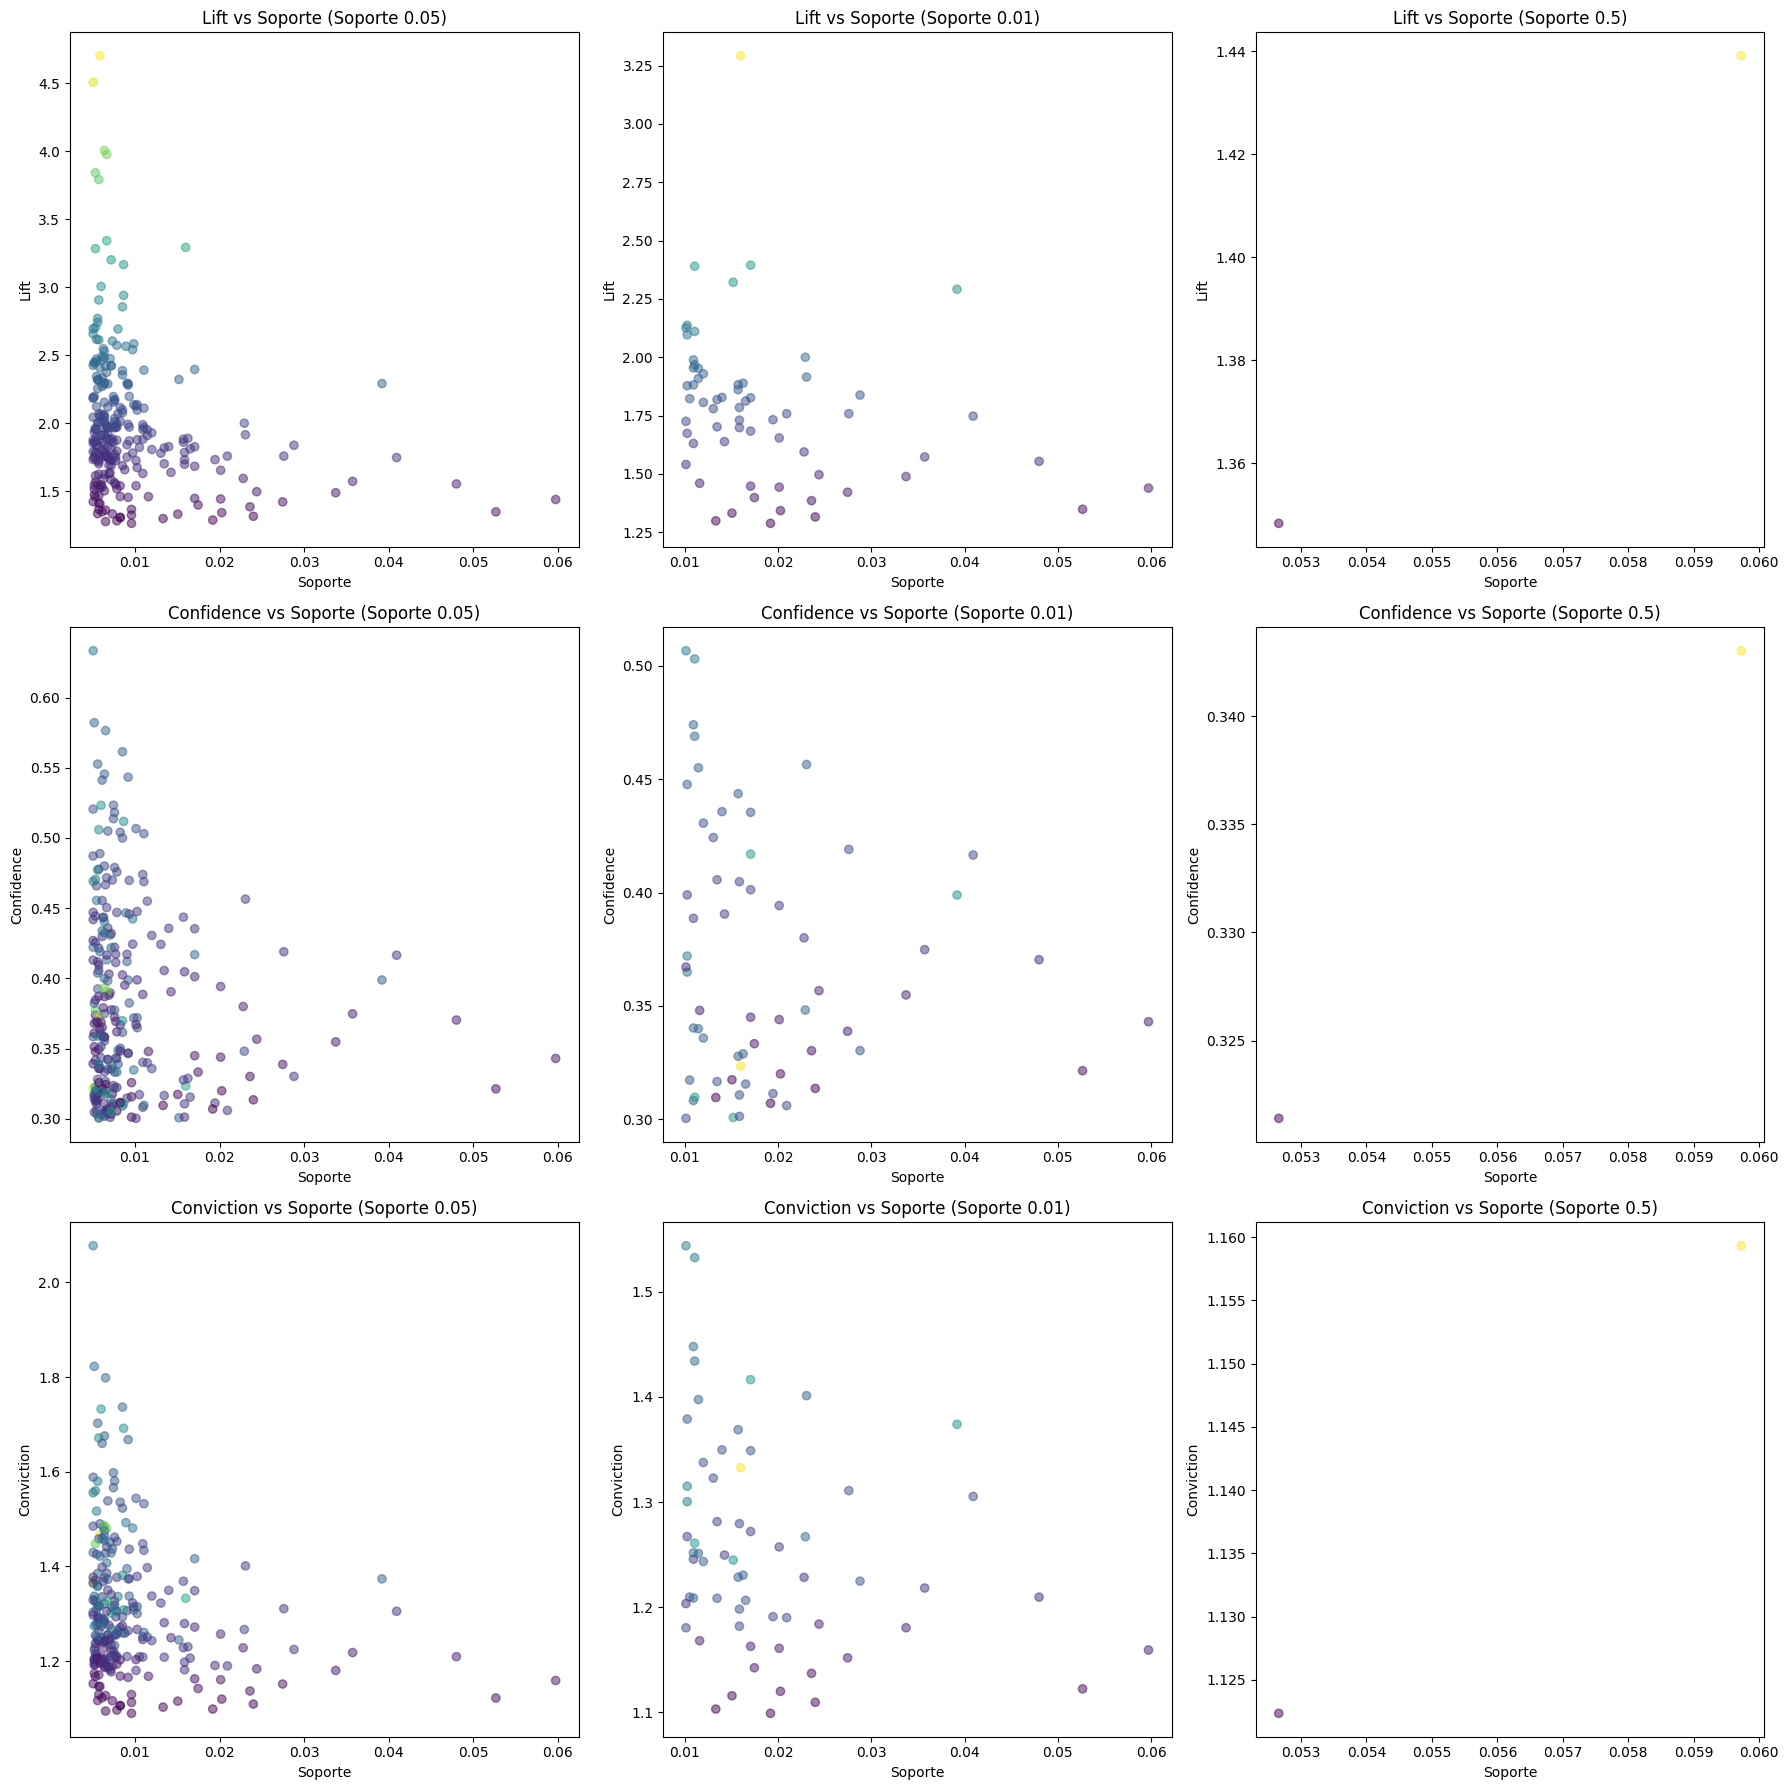

In [9]:
# Crear una figura con 3 columnas y 3 filas.
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Lista de etiquetas para las métricas.
metric_labels = ['Lift', 'Confidence', 'Conviction']
soportes = ['0.05', '0.01', '0.5']

# Iterar sobre cada conjunto de reglas y cada métrica.
for i, reglas in enumerate([reglas005, reglas01, reglas05]):

    for j, metrica in enumerate(['lift', 'confidence', 'conviction']):

        # Seleccionar el eje correspondiente.
        ax = axes[j, i]  # Intercambio de filas y columnas.

        # Graficar Soporte vs Métrica.
        ax.scatter(reglas['support'], reglas[metrica], alpha=0.5, c=reglas['lift'], cmap='viridis')
        ax.set_xlabel('Soporte')
        ax.set_ylabel(metric_labels[j])
        ax.set_title(f'{metric_labels[j]} vs Soporte (Soporte {soportes[i]})')

# Ajustar los espaciados entre los subplots para evitar superposiciones.
plt.tight_layout()
plt.show()

Creamos un gráfico de dispersión que relaciona las métricas de soporte y confianza de las reglas, además los puntos de la gráfica serán coloreados dependiendo del lift que tengan las mismas.

**Soporte vs. Confianza (Soporte 0.05)**: El primer gráfico muestra reglas con un umbral de soporte de 0.05. Observamos una alta densidad de puntos con confianza variable, lo que indica muchas reglas con un soporte específico, esto sugiere que hay muchas combinaciones de productos que se compran juntas con una frecuencia relativamente baja, pero con diferentes grados de confianza. El color de los puntos representa el 'lift', y la variación de colores sugiere diferencias en el grado de asociación entre los ítems de las reglas.

**Soporte vs. Confianza (Soporte 0.1):** El segundo gráfico muestra las reglas con un umbral de soporte de 0.1. Comparado con el gráfico anterior, hay menos puntos, lo que es esperado ya que un mayor soporte tiende a reducir el número de reglas encontradas, esto refleja que hay menos combinaciones de productos que alcanzan este umbral de soporte, pero las que sí lo hacen pueden ser muy relevantes para la mayoría de los clientes. Los colores indican que, aunque hay menos reglas, algunas de ellas tienen un 'lift' significativo, esto sugiere que la asociación entre los productos en esta regla es muy fuerte y que los productos se compran juntos con mucha más frecuencia de lo que se comprarían por separado. El punto amarillo dentro de este grafo podría representar una oportunidad muy relevante para acciones de marketing.

**Soporte vs. Confianza (Soporte 0.5):** El tercer gráfico muestra las reglas con un umbral de soporte mucho más alto, 0.5. En este caso, solo se muestran dos puntos, lo que indica que pocas reglas cumplen con este criterio estricto de soporte. El color del punto morado sugiere que el 'lift' de esta regla es bajo en comparación con los mostrados en los gráficos anteriores. Mientras que el color del punto amarillo, como ya hemos mencionado anteriormente sugiere que los productos en esta regla no solo se compran juntos con mayor frecuencia (mayor soporte), sino que también hay una fuerte dependencia entre la compra de un producto y el otro (mayor confianza).

Llegamos a la conlcusión de que una **alta confianza** puede indicar una alta probabilidad en que cuando se compra un producto, también se comprará otro específico. El supermercado podría aprovechar esta oportunidad asegurándose de que estos dos productos estén ubicados cercanos el uno al otro para incentivar la venta cruzada.

Además también podemos relacionar un **alto lift** con la relación entre la compra de dos productos es más fuerte de lo que sería si fueran independientes. El supermercado podría usar esta información para crear promociones de paquetes.

La **alta convicción** muestra que es poco probable que la compra del producto B no siga a la compra del producto A. Es una medida más fuerte que la confianza porque tiene en cuenta la frecuencia con la que la regla podría ser incorrecta. Este conocimiento es valioso para tomar decisiones de gestión de inventario, asegurando que cuando se espera un aumento en las ventas de A (por ejemplo, durante una promoción), el supermercado también esté bien abastecido de B.

Al integrar estas métricas en la toma de decisiones, un supermercado puede desarrollar estrategias que no solo maximicen las ventas, sino que también mejoren la experiencia de compra del cliente, haciendo más fácil y agradable encontrar y comprar productos complementarios. Además, al entender las relaciones entre productos, se pueden anticipar las necesidades de inventario y reducir tanto la sobreproducción como la falta de stock, lo cual es esencial para la eficiencia operativa y la satisfacción del cliente.

**Dadas las mejores configuraciones, ¿existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera cómo se comportan los clientes del supermercado?**

In [ ]:
antecedente_busqueda = {'spaghetti'}

#filtramos las reglas que contienen el antecedente de búsqueda.
reglas_filtradas = reglas01[reglas01['antecedents'].apply(lambda x: antecedente_busqueda.issubset(x))]

print(reglas_filtradas)

                        antecedents      consequents  antecedent support  \
234                     (spaghetti)  (mineral water)            0.174110   
273               (spaghetti, milk)      (chocolate)            0.035462   
277          (spaghetti, chocolate)  (mineral water)            0.039195   
288               (spaghetti, eggs)  (mineral water)            0.036528   
291       (spaghetti, french fries)  (mineral water)            0.027596   
298  (frozen vegetables, spaghetti)  (mineral water)            0.027863   
306        (ground beef, spaghetti)  (mineral water)            0.039195   
310               (spaghetti, milk)  (mineral water)            0.035462   
314          (spaghetti, olive oil)  (mineral water)            0.022930   
318           (pancakes, spaghetti)  (mineral water)            0.025197   

     consequent support   support  confidence      lift  leverage  conviction  \
234            0.238368  0.059725    0.343032  1.439085  0.018223    1.159314   
2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Después de una gran labor de análisis de las reglas con mayor confianza y lift que han sido dadas por los mejores modelos, podemos hacer un pequeño resumen final de como se comportan los clientes de este supermercado estudiado.

**Hallazgos Clave**:

- *Preferencia por Combinaciones Comunes*: Se ha identificado una tendencia significativa de los clientes a comprar espaguetis junto con agua mineral. Esto podría sugerir una inclinación hacia comidas que se perciben como fáciles y rápidas de preparar, donde el agua mineral actúa como una bebida complementaria habitual y además, un ingrediente necesario para cocinar espaguetis.

- *Alto Lift en Productos Complementarios*: Las reglas que incluyen espaguetis y otros ítems como carne molida, aceite de oliva y queso presentan un alto valor de lift, indicando que estos productos se compran juntos más frecuentemente de lo que se esperaría por casualidad. Esto nos da a entender a la compra de ingredientes para platos específicos, posiblemente para la preparación de pastas.

- *Asociaciones Concretas para Promociones*: Productos como chocolate y pancakes, aunque menos intuitivos, aparecen en combinaciones con espaguetis o agua. Estas asociaciones podrían ser estudiadas para promociones cruzadas o para sugerir recetas en el punto de venta.

Este pequeño resumen sugiere que hay una gran oportunidad para incrementar las ventas a través de una mejor comprensión de las preferencias y hábitos de compra de los clientes, aplicando estrategias basadas en datos para la promoción, merchadaising y colocación en el supermercado.


In [ ]:
# Supongamos que estamos buscando reglas que tengan 'antecedente_busqueda' como antecedente.
antecedente_busqueda = {'burgers'}

# Filtrar las reglas que contienen el antecedente de búsqueda.
reglas_filtradas = reglas01[reglas01['antecedents'].apply(lambda x: antecedente_busqueda.issubset(x))]

# Mostrar las reglas filtradas.
print(reglas_filtradas)

  antecedents consequents  antecedent support  consequent support   support  \
5   (burgers)      (eggs)            0.087188            0.179709  0.028796   

   confidence     lift  leverage  conviction  zhangs_metric  
5    0.330275  1.83783  0.013128    1.224818       0.499424  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Practica 2 (Patrones Secuanciales)**

El conjunto de datos “Online Retail.xlsx” contiene productos (definidos por la columna StockCode y
Description) comprados por diferentes clientes (definidos por la columna CustomerID) en diferentes
momentos (definidos por el campo InvoiceDate. Habrá que procesar el fichero para crear una lista de los
distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instantes (2
puntos). Una vez hecho esto y analizando esta información se pueden extraer conclusiones sobre en que orden
compran los clientes los productos y así tomar decisiones de negocio. Este estudio se puede llevar a cabo
aplicando el algoritmo Generalized Sequential Patterns utilizando la implementación de éste disponible en la
librería gsppy.

Prueba al menos dos configuraciones de soporte diferentes. (1 punto)

Para una de ellas, interpreta algunos de los patrones secuenciales que te resulten curiosos. (1 punto)

Saca conclusiones de negocio en virtud de algunas de las reglas elegidas por vosotros que mayor confianza
tengan(1 punto)

**EJERCICIO 2**

Se empleará la metodología KDD, Knowledge Discovery in Databases, esta metodología sirve para analizar grandes conjuntos de datos con el objetivo de encontrar patrones significativos. KDD engloba varias etapas, desde la selección y preprocesamiento de los datos hasta la minería de datos, interpretación y evaluación de los resultados.

**1. Selección de datos**

Comenzamos cargando la base de datos "Online Retail", la cual contiene datos sobre transacciones de comercio electrónico, incluyendo detalles como el número de factura, código de producto, descripción del artículo adquirido, cantidad comprada, fecha de la factura, precio por unidad, identificación del cliente y el país de la compra y el ID del cliente.

Procedemos a ejecutar el método head() para obtener una vista preliminar de los primeros registros en la base de datos. Esto nos ayudará a comprender el formato de los datos y determinar cuáles son relevantes para nuestro análisis.

In [10]:
import pandas as pd

# Cargamos el conjunto de datos
data = pd.read_excel('Online_Retail.xlsx')

data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


**2. Preprocesamiento**

Procederemos con un análisis detallado de la base de datos "Online Retail". Nuestro primer paso será limpiar los datos, eliminando aquellas entradas que puedan sesgar o interferir con el estudio.

En esta fase se eliminan los datos redundantes, datos incorrectos, errores de transcripción, datos envejecidos o variaciones de datos.

Comenzaremos identificando y examinando los valores atípicos, o outliers, en las variables 'Cantidad' (Quantity) y 'Precio Unitario' (Unit Price).

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


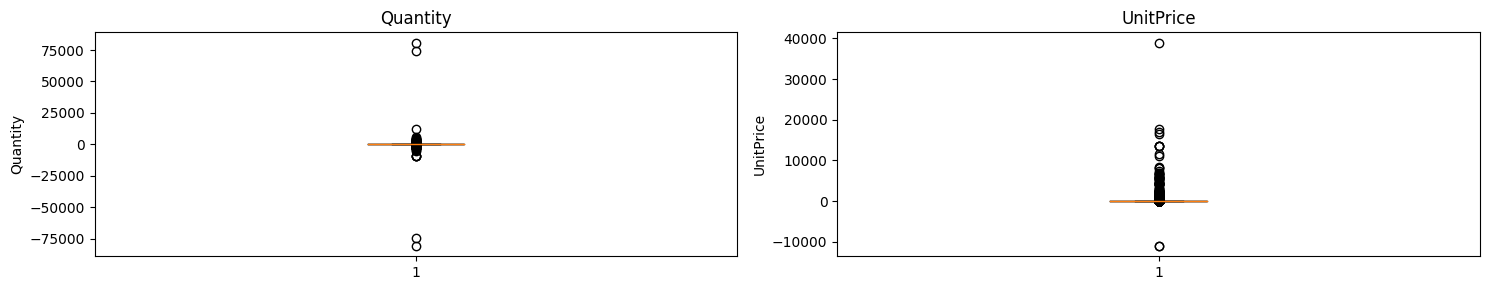

Variable        IQR             Num Outliers
------------------------------------------------
Quantity        9.0             58619     
UnitPrice       2.88            39627     


In [11]:
plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1)
plt.boxplot(data["Quantity"].dropna())
plt.title('Quantity')
plt.ylabel('Quantity')

plt.subplot(1, 2, 2)
plt.boxplot(data['UnitPrice'].dropna())
plt.title('UnitPrice')
plt.ylabel('UnitPrice')

plt.tight_layout()
plt.show()


#Calculamos el primer y tercer cuartil de ambas variables
Q1w = data['Quantity'].quantile(0.25)
Q3w = data['Quantity'].quantile(0.75)

#Rango intercuartílico
RangoIntw = Q3w - Q1w

Q1o = data['UnitPrice'].quantile(0.25)
Q3o = data['UnitPrice'].quantile(0.75)

#Rango intercuartílico
RangoInto = Q3o - Q1o

#Datos menores o mayores al rango*1.5
outliers_quantity = data[(data['Quantity'] < (Q1w - 1.5 * RangoIntw)) | (data['Quantity'] > (Q3w + 1.5 * RangoIntw))]

outliers_price = data[(data['UnitPrice'] < (Q1o - 1.5 * RangoInto)) | (data['UnitPrice'] > (Q3o + 1.5 * RangoInto))]

# Usamos .shape[0] para obtener la cantidad de outliers en cada caso
num_outliers_quantity = outliers_quantity.shape[0]
num_outliers_price = outliers_price.shape[0]

print(f"{'Variable       '} {'IQR            '} {'Num Outliers'}")
print(f"{'------------------------------------------------'}")
print(f"{'Quantity       '} {RangoIntw:<15} {num_outliers_quantity:<10}")
print(f"{'UnitPrice      '} {RangoInto:<15} {num_outliers_price:<10}")

Hemos identificado 58,619 valores atípicos en la variable 'Cantidad' y 39,627 en 'Precio Unitario'. Se tomará la decisión de excluir estos valores extremos de nuestro análisis ya que, dada su magnitud, podrían ser el resultado de errores de medición o de ingreso de datos.

Comprobamos que se hayan eliminado al imprimir los tamaños de la base de datos original y de la base de datos que ha tenido cambios y se puede ver como efectivamente el tamaño ha disminuido.

In [12]:
#Indices de los outliers para poder usar drop
outliers_indices_quantity = outliers_quantity.index
outliers_indices_price = outliers_price.index

#Unión de índices
all_outliers_indices = outliers_indices_quantity.union(outliers_indices_price)

# Eliminamos los outliers
data_clean = data.drop(index=all_outliers_indices)

print(f"Original data size: {data.shape}")
print(f"Clean data size: {data_clean.shape}")

Original data size: (541909, 8)
Clean data size: (444108, 8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Después de descartar los valores atípicos, continuaremos con la limpieza de la base de datos para prepararla para el análisis de patrones de compra.

Lo primero será eliminar los datos negativos de cantidad y precio, estos valores negativos pueden ser indicativos de devoluciones o errores en la captura de datos y podrían sesgar nuestro análisis de secuencias de compra.

Posteriormente, procederemos a descartar todos aquellos registros que no tengan un 'Código de Stock' asociado. La presencia de un código de stock es fundamental para nuestra investigación, ya que es la clave principal que utilizaremos para analizar los patrones de compra de productos.

Como paso final en nuestro proceso de limpieza, filtraremos la base de datos para conservar exclusivamente aquellos registros con códigos de stock que cumplan con un formato estandarizado: este debe constar de cinco dígitos numéricos o, alternativamente, de cinco dígitos numéricos seguidos de una letra.

In [13]:
menor_a_1 = data_clean[(data_clean['Quantity'] < 1) | (data_clean['UnitPrice'] <= 0)].index
data_clean = data_clean.drop(index=menor_a_1)

data_clean = data_clean.dropna(subset=['Description'])

#Eliminar Nan de Stock Code
data_clean = data_clean.dropna(subset=['StockCode'])


def valido(code):

    code = str(code)

    # Verifica si el StockCode tiene exactamente 5 dígitos
    if len(code) == 5 and code.isdigit():
        return True
    # Verifica si el StockCode tiene 5 dígitos seguidos de una letra
    elif len(code) == 6 and code[:5].isdigit() and code[5].isalpha():
        return True
    else:
        return False

data_clean = data_clean[data_clean['StockCode'].apply(valido)]

# Verificamos los cambios
print(f"Original data size: {data.shape}")
print(f"Clean data size: {data_clean.shape}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original data size: (541909, 8)
Clean data size: (435647, 8)


**3. Transformación**

En la tercera fase se hace el tratatamiento preeliminar de los datos, en este punto los datos cambian con ek propósito de adaptarlos a un algoritmo específico.

Ahora que hemos purificado la base de datos, nuestro siguiente paso es estructurar los datos de manera que podamos aplicar el algoritmo GSP para el análisis de secuencias de transacciones. Para ello, organizaremos las transacciones en una estructura de lista anidada, de modo que cada lista represente la secuencia de compras de un cliente.

Empezaremos agrupando los registros por 'ID de Cliente', ya que el algoritmo GSP requiere identificar secuencias dentro de las actividades de un mismo cliente. Dentro de cada grupo de cliente, realizaremos un segundo agrupamiento según la 'Fecha de Factura', lo cual nos permitirá distinguir distintas transacciones realizadas por el mismo cliente en momentos diferentes.

El resultado final será una lista principal que contendrá las listas de cada cliente. A su vez, cada lista de cliente consistirá en listas de transacciones, donde cada transacción estará compuesta por una lista de los elementos comprados, representados exclusivamente por su 'Código de Stock'. Esta jerarquía reflejará con precisión las secuencias de compra, preservando la cronología y la singularidad de cada transacción realizada por el cliente.

In [14]:
import warnings
#Ignorar warnings
warnings.filterwarnings('ignore')

# Agrupamos los datos por 'CustomerID'
grouped_by_customer = data_clean.groupby('CustomerID')

# Inicializamos la lista de listas de listas de transacciones
clientes_transacciones = []

# Iteramos sobre cada grupo de clientes
for _, customer_data in grouped_by_customer:
    # Agrupamos las transacciones del cliente por 'InvoiceDate'
    grouped_by_invoice = customer_data.groupby('InvoiceDate')

    # Inicializamos la lista de transacciones para este cliente
    transacciones_cliente = []

    # Iteramos sobre cada grupo de transacciones
    for _, invoice_data in grouped_by_invoice:
        # Creamos una lista de transacciones donde cada transacción es una lista de 'StockCode'
        transacciones = [stock_code for stock_code in invoice_data['StockCode']]
        # Agregamos la lista de transacciones al cliente
        transacciones_cliente.append(transacciones)

    # Agregamos la lista de transacciones del cliente a la lista general de clientes
    clientes_transacciones.append(transacciones_cliente)

print(clientes_transacciones[:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[[85116, 22375, 71477, 22771, 22772, 22773, 22774, 22775, 22805, 22725, 22726, 22727, 22728, 22729, 22212, 21171, 22195, 84969, '84997C', '84997B', '84997D', 22494, 22497, '85232D', 21064, 21731, 20780, 20782], [85116, 20719, 22375, 22376, 20966, 22725, 22726, 22727, 22728, 22729, 22196, '47559B', 21154, 21041, 21035, 84969, 22134, 21832, 22422, 22497, 21731, '84558A'], [22376, 22374, 22371, 22375, 20665, 21791, 22550, 23177, 22432, 22774, 22195, 22196, 21041, 22699, 21731, '84559A', '84559B', 22821, 22497], [23084, 23162, 23171, 23172, 23170, 23174, 23175, 22371, 22375, 85178, 23146, '84558A', '51014C', 22727, 22725], [23297, 22375, 22374, 22376, 22371, 22372, 21578, 20719, 22727, 23146, 23147, '47559B', 23175, 22992, 23316], [23480, 21265, 21636, 22372, 22375, 22371, 22374, 22252, 22945, 47580, '47567B', '47559B', 22698, 22697, 21731, 23177, 21791, 23508, 23506, 23503, 22992, 22561, 22621, 23146, 23421, 23422, 23420, 22699, 22725, 22728, 22726, 22727, 20719, 23162, 22131], [23497, 2

El paso final en la preparación de los datos es convertir los códigos de stock a un formato compatible. Dado que GSP funciona exclusivamente con números enteros, modificaremos los 'Códigos de Stock' que terminan en una letra, reemplazando dicha letra por un número. Elegimos el siguiente cambio: la 'A' se transformará en el número '1', la 'B' en '2', y así sucesivamente, siguiendo el orden alfabético.

Este ajuste asegurará la compatibilidad con las restricciones del algoritmo GSP, manteniendo al mismo tiempo la capacidad de referenciar los códigos originales una vez que hayamos terminado el análisis. Después de implementar las reglas de asociación y secuencias descubiertas, podremos revertir fácilmente estos códigos a su formato original, permitiéndonos identificar con precisión los artículos involucrados en las transacciones.

In [15]:
def cambiar_letra_por_numero(element):
    #Convertimos todos los elementos a string
    if isinstance(element, int):
        element = str(element)

    if len(element) == 6 and element[-1].isalpha():
        # Creamos un mapeo de letras a números, asumiendo que 'a' corresponde a 1, 'b' a 2, etc.
        letter_to_number = {letter: str(index) for index, letter in enumerate('abcdefghijklmnopqrstuvwxyz', start=1)}
        # Reemplazamos el sexto carácter si es una letra
        if element[-1].lower() in letter_to_number:
            element = element[:-1] + letter_to_number[element[-1].lower()]
    return element


# Aplicamos la función a cada elemento de la lista de listas de listas
transacciones_converted = [[[cambiar_letra_por_numero(item) for item in transaction] for transaction in client] for client in clientes_transacciones]


print(transacciones_converted[:5])

[[['85116', '22375', '71477', '22771', '22772', '22773', '22774', '22775', '22805', '22725', '22726', '22727', '22728', '22729', '22212', '21171', '22195', '84969', '849973', '849972', '849974', '22494', '22497', '852324', '21064', '21731', '20780', '20782'], ['85116', '20719', '22375', '22376', '20966', '22725', '22726', '22727', '22728', '22729', '22196', '475592', '21154', '21041', '21035', '84969', '22134', '21832', '22422', '22497', '21731', '845581'], ['22376', '22374', '22371', '22375', '20665', '21791', '22550', '23177', '22432', '22774', '22195', '22196', '21041', '22699', '21731', '845591', '845592', '22821', '22497'], ['23084', '23162', '23171', '23172', '23170', '23174', '23175', '22371', '22375', '85178', '23146', '845581', '510143', '22727', '22725'], ['23297', '22375', '22374', '22376', '22371', '22372', '21578', '20719', '22727', '23146', '23147', '475592', '23175', '22992', '23316'], ['23480', '21265', '21636', '22372', '22375', '22371', '22374', '22252', '22945', '475

Una vez que tenemos la lista de transacciones creadas descargamos la librería gsp-python para poder realizar un análisis siguiendo el algoritmo de Generalized Sequential Pattern.

**4. Técnicas de Data Mining**

Se va a utilizar la técina de GSP para encontrar patrones en los datos. GSP es un método para encontrar patrones secuenciales, a diferencia de otros métodos, GSPno solo encuentra los ítems que se compran con frecuencia, sino que también revela la secuencia en que estos ítems son comprados. Toma en cuenta el cliente que realiza la compra y el tiempo de cada compra.

GSP resuelve problemas predictivos, obtiene el valor de variables del futuro a partir de variables conocidas. Vamos a utilizar la siguiente función de phyton, ya que se adecua al formato de datos que tenemos de patrones secuenciales.

In [16]:
! pip install gsp-python
from gsp_python.gsp import GSP

In [17]:
soporte_minimo = 0.05  # 5%

gsp_instance = GSP(transacciones_converted, soporte_minimo)

# Ejecutar GSP
output = gsp_instance.run_gsp()

# Imprimir los resultados
print(output)

[([['22726']], 320), ([['22727']], 381), ([['22728']], 285), ([['849974']], 235), ([['21731']], 242), ([['20719']], 229), ([['21791']], 315), ([['22699']], 388), ([['23084']], 388), ([['22698']], 295), ([['22697']], 355), ([['23503']], 252), ([['22561']], 264), ([['22621']], 346), ([['48194']], 284), ([['84978']], 266), ([['22557']], 301), ([['23198']], 249), ([['22666']], 453), ([['22720']], 620), ([['22960']], 557), ([['22722']], 379), ([['22692']], 230), ([['20914']], 339), ([['20685']], 324), ([['21533']], 210), ([['22553']], 267), ([['23293']], 301), ([['23296']], 224), ([['23295']], 234), ([['23240']], 318), ([['22326']], 270), ([['22554']], 331), ([['22555']], 271), ([['23493']], 271), ([['21136']], 239), ([['23263']], 257), ([['23439']], 251), ([['35970']], 239), ([['22556']], 287), ([['23108']], 265), ([['48184']], 227), ([['21908']], 212), ([['22551']], 318), ([['21915']], 314), ([['22620']], 256), ([['21232']], 277), ([['21755']], 337), ([['21754']], 359), ([['22630']], 278)

Se establece un soporte mínimo de 5%, este valor es el porcentaje mínimo de aparición de un patrón en el conjunto de datos para que se considere frecuente y por ende, relevante para los resultados.
Ahora se le pasa a la instancia de GSP creada la lista de transacciones y el soporte mínimo como parámetros.
Después se ejecuta el algoritmo, este proceso buscará patrones que cumplan con el soporte mínimo especificado.

Los resultados mostrados en pantalla son una lista de tuplas donde cada tupla muestra los elementos fecuentes y el número de apariciones que tienen en el conjunto de datos. Estas tuplas pueden ser de 1 solo elemento o de un número mayor.

Por ejemplo, la primera tupla (['22726'], 321) indica que el artículo con el código '22726' aparece en un patrón frecuente en las transacciones y este patrón se repite 321 veces en las transacciones.

Las reglas que contienen solo 1 elemento pueden ser útiles para identificar que elementos son los más popoulares por si solos, estos productos se ven con mayor frecuencia por lo que las empresas pueden recomendar productos complementarios a este para aumentar las ventas. Además puede ayudar con la planificación del inventario ya que al saber que productos se venden con mayor facilidad, las empresas pueden garantizar tener suficiente stock de los productos más demandados para evitar problemas de escasez.

Otra ventaja es para aplicar segmentación de clientes, los productos preferidos pueden variar entre distintos grupos de consumidores. Y al identificarlos las empresas pueden personalizar sus estrategias de marketing y presentar ofertas y promociones adaptadas a cada conjunto específico de consumidores.

---
Utilizando el conjunto de ítems que aparecen con frecuencia, establecemos reglas de asociación cuando estos ítems constan de dos o más elementos. Estas reglas nos permiten descubrir relaciones significativas y patrones de compra entre los productos.

Para ello, primero garantizamos que los conjuntos de ítems tengan al menos dos componentes. Luego, desglosamos cada conjunto en todas las combinaciones posibles de antecedentes y consecuentes, asegurándonos de que ambos contengan al menos un elemento. Estas combinaciones son reglas de asociación, cada una con un antecedente y un consecuente. Al aplicar estas reglas, las empresas pueden desarrollar estrategias más dirigidas, como agrupar productos complementarios o diseñar descuentos específicos.

In [18]:
frequencia = []

# Generar reglas de asociación
association_rules = []

# Recorrer la lista de tuplas
for itemset, frequency in output:
    frequencia.append(frequency)


    # Verificar si el itemset tiene más de un elemento
    if len(itemset[0]) > 1:
        # Aplanar la lista itemset
        flat_itemset = [item for sublist in itemset for item in sublist]
        # Generar reglas de asociación
        for i in range(len(flat_itemset)):
            antecedent = flat_itemset[:i]
            consequent = flat_itemset[i:]
            # Asegurarse de que tanto el antecedente como el consecuente tengan elementos
            if antecedent and consequent:
                association_rules.append((antecedent, consequent, frequency))

# Imprimir las reglas de asociación
for rule in association_rules:
    print(f"Regla: {rule[0]} -> {rule[1]}")

print(f"Total de reglas: {len(association_rules)}")

Regla: ['22726'] -> ['22727']
Regla: ['22698'] -> ['22699']
Regla: ['22697'] -> ['22699']
Regla: ['22697'] -> ['22698']
Regla: ['22720'] -> ['22722']
Regla: ['22138'] -> ['22617']
Regla: ['23298'] -> ['47566']
Regla: ['20725'] -> ['22384']
Regla: ['20725'] -> ['22382']
Regla: ['20725'] -> ['20728']
Regla: ['20725'] -> ['22383']
Regla: ['20725'] -> ['20727']
Regla: ['20726'] -> ['22382']
Regla: ['22382'] -> ['22383']
Regla: ['20728'] -> ['22384']
Regla: ['20728'] -> ['22382']
Regla: ['20728'] -> ['22383']
Regla: ['23203'] -> ['850992']
Regla: ['23203'] -> ['23209']
Regla: ['21733'] -> ['851231']
Regla: ['20727'] -> ['22384']
Regla: ['20727'] -> ['22382']
Regla: ['20727'] -> ['22383']
Regla: ['22386'] -> ['850992']
Regla: ['22086'] -> ['22910']
Regla: ['22469'] -> ['22470']
Regla: ['23300'] -> ['23301']
Regla: ['82482'] -> ['8249412']
Regla: ['22697'] -> ['22698', '22699']
Regla: ['22697', '22698'] -> ['22699']
Total de reglas: 30


En total, se han generado 30 reglas, cada una ofreciendo un posible insight sobre el comportamiento del consumidor.
Por ejemplo en la primera regla, el producto que tiene el stockCode "22726" está asociado con el "22727" sugiriendo que los clientes que compran el  elemento "22726" suelen comprar después el elemento "22727".

Para poder sacar conclusiones de estas reglas debemos primero evauar que tan confiables son por medio del cáculo de su confianza. Además, para dar un contexto más claro y aplicable a los hallazgos, es necesario asociar cada código de producto con su respectivo nombre.

La confianza  se refiere a la medida de la fiabilidad o certeza de una regla de asociación entre conjuntos de elementos en un conjunto de datos. Es una métrica utilizada para evaluar la fuerza de una relación entre un antecedente (un conjunto de elementos) y un consecuente (otro conjunto de elementos) en un conjunto de datos transaccional.

En el código, calculamos la confianza para cada regla de asociación extraída utilizando el algoritmo GSP. Primero, determinamos la frecuencia de aparición de cada regla en el conjunto de datos, lo que representa cuántas veces se observa la regla en las transacciones. Luego, calculamos la frecuencia del antecedente de la regla en las transacciones para obtener una medida del soporte del antecedente. La confianza se calcula dividiendo la frecuencia de la regla entre la frecuencia del antecedente. Esto nos da una medida de cuántas veces el consecuente ocurre en transacciones que también contienen el antecedente. Finalmente, almacenamos las confianzas calculadas en un vector para su posterior análisis y utilización en tareas de toma de decisiones o recomendación.


In [19]:
# Calcular la confianza para cada regla de asociación
confianzas = []  # Vector para almacenar las confianzas

for rule, frequency in zip(association_rules, frequencia):
    antecedent = rule[0]
    consequent = rule[1]

    # Calcular la frecuencia del antecedente y el consecuente juntos (soporte de la regla)
    support_rule = frequency

    # Calcular la frecuencia del antecedente
    support_antecedent = 0  # Inicializar el contador de soporte

    # Iterar sobre cada transacción en transacciones_converted
    for transaccion in transacciones_converted:
        # Verificar si todos los elementos del antecedente están presentes en la transacción actual
        if (item in transaccion for item in antecedent):
            # Si están presentes, incrementar el contador de soporte
            support_antecedent += 1

    # Calcular la confianza
    if support_antecedent > 0:  # Evitar división por cero
        confidence = support_rule / support_antecedent
    else:
        confidence = 0  # Si el antecedente no está presente en ninguna transacción, la confianza es 0

    # Agregar la confianza al vector
    confianzas.append(confidence)

In [20]:
#lista con solo los dos primeros elementos de cada tupla, ya no guardamos la frecuencia
association_rules_nuevo = [(tupla[0], tupla[1]) for tupla in association_rules]

Para recuperar los códigos de stock originales, necesitamos revertir el proceso que habíamos aplicado antes, en el cual cambiamos la letra al final del código por un número. Al revertir estos cambios, podremos obtener los códigos de stock en su forma original. Con estos códigos originales en mano, podremos identificar el producto al que corresponde cada uno.

In [21]:
# Lista transformada
lista_transformada = []

# Iterar sobre cada tupla en la lista original
for tupla in association_rules_nuevo:
    # Convertir el primer elemento de la tupla
    nuevo_primer_elemento = []
    for elemento in tupla[0]:
        if len(elemento) > 5:
            nuevo_elemento = elemento[:5] + ''.join([chr(int(digito) + 64) for digito in elemento[5:]])
            nuevo_primer_elemento.append(nuevo_elemento)
        else:
            nuevo_primer_elemento.append(elemento)

    # Convertir el segundo elemento de la tupla
    nuevo_segundo_elemento = []
    for elemento in tupla[1]:
        if len(elemento) > 5:
            nuevo_elemento = elemento[:5] + ''.join([chr(int(digito) + 64) for digito in elemento[5:]])
            nuevo_segundo_elemento.append(nuevo_elemento)
        else:
            nuevo_segundo_elemento.append(elemento)

    # Agregar la tupla transformada a la lista transformada
    lista_transformada.append((nuevo_primer_elemento, nuevo_segundo_elemento))

# Mostrar la lista transformada
print(lista_transformada)

[(['22726'], ['22727']), (['22698'], ['22699']), (['22697'], ['22699']), (['22697'], ['22698']), (['22720'], ['22722']), (['22138'], ['22617']), (['23298'], ['47566']), (['20725'], ['22384']), (['20725'], ['22382']), (['20725'], ['20728']), (['20725'], ['22383']), (['20725'], ['20727']), (['20726'], ['22382']), (['22382'], ['22383']), (['20728'], ['22384']), (['20728'], ['22382']), (['20728'], ['22383']), (['23203'], ['85099B']), (['23203'], ['23209']), (['21733'], ['85123A']), (['20727'], ['22384']), (['20727'], ['22382']), (['20727'], ['22383']), (['22386'], ['85099B']), (['22086'], ['22910']), (['22469'], ['22470']), (['23300'], ['23301']), (['82482'], ['82494AB']), (['22697'], ['22698', '22699']), (['22697', '22698'], ['22699'])]


Para hacer esto, se itero sobre cada elemento en el primer elemento de la tupla y si la longitud del elemento es mayor a 5, corta el elemento en la posición 5 y concatenamos el resultado con una transformación del sexto elemento: cada dígito en un carácter.

Si la longitud del elemento es 5 o menos, simplemente lo agregamos a nuevo_primer_elemento sin cambiarlo.

Repetimos un proceso similar para el segundo elemento de la tupla, almacenando los resultados en una lista nuevo_segundo_elemento.



**5. Interpretación y Evaluación**

En esta fase se presentan los patrones obtenidos de una forma que sean entendibles para poder sacar conclusiones.
Creamos primero un diccionario que mapea cada 'StockCode' a su 'Description'. Luego, iteramos sobre una lista previamente transformada que contiene pares de códigos de stock, sustituyendo cada código por su descripción usando el diccionario creado. Esto se hace tanto para los antecedentes como para los consecuentes de cada par.



In [22]:
# Crear un diccionario de mapeo de StockCode a Description
stockcode_to_description = data.set_index('StockCode')['Description'].to_dict()

# Crear una nueva lista transformada con descripciones en lugar de códigos de stock
lista_transformada_descripciones = []

# Iterar sobre cada elemento de lista_transformada
for itemset in lista_transformada:
    # Reemplazar los códigos de stock por las descripciones correspondientes en el antecedente
    antecedent_descriptions = []
    for item in itemset[0]:
        # Verificar si el código de stock es solo dígitos
        if item.isdigit():
            antecedent_descriptions.append(stockcode_to_description.get(int(item)))
        else:
            antecedent_descriptions.append(stockcode_to_description.get(item, item))

    # Reemplazar los códigos de stock por las descripciones correspondientes en el consecuente
    consequent_descriptions = []
    for item in itemset[1]:
        # Verificar si el código de stock es solo dígitos
        if item.isdigit():
            consequent_descriptions.append(stockcode_to_description.get(int(item)))
        else:
            consequent_descriptions.append(stockcode_to_description.get(item, item))

    # Agregar el par (antecedente, consecuente) a la lista transformada con descripciones
    lista_transformada_descripciones.append((antecedent_descriptions, consequent_descriptions))

# Mostrar la nueva lista transformada con descripciones
print(lista_transformada_descripciones)


[(['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE RED ']), (['PINK REGENCY TEACUP AND SAUCER'], ['ROSES REGENCY TEACUP AND SAUCER ']), (['GREEN REGENCY TEACUP AND SAUCER'], ['ROSES REGENCY TEACUP AND SAUCER ']), (['GREEN REGENCY TEACUP AND SAUCER'], ['PINK REGENCY TEACUP AND SAUCER']), (['SET OF 3 CAKE TINS PANTRY DESIGN '], ['SET OF 6 SPICE TINS PANTRY DESIGN']), (['BAKING SET 9 PIECE RETROSPOT '], ['BAKING SET SPACEBOY DESIGN']), (['SPOTTY BUNTING'], ['PARTY BUNTING']), (['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG PINK POLKADOT']), (['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG SPACEBOY DESIGN ']), (['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG CARS BLUE']), (['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG SUKI DESIGN ']), (['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG  BLACK SKULL.']), (['LUNCH BAG WOODLAND'], ['LUNCH BAG SPACEBOY DESIGN ']), (['LUNCH BAG SPACEBOY DESIGN '], ['LUNCH BAG SUKI DESIGN ']), (['LUNCH BAG CARS BLUE'], ['LUNCH BAG PINK POLKADOT']), (['LUNCH BAG CARS BLUE'], ['LUNCH BAG SPAC

In [23]:
# Imprimir las reglas de asociación con descripciones y confianza
for i, rule in enumerate(lista_transformada_descripciones):
    antecedent = ", ".join(rule[0])
    consequent = ", ".join(rule[1])
    print(f"Regla {i+1}: {antecedent} -> {consequent}, Confianza: {round(confianzas[i], 4)}")

Regla 1: ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKELIKE RED , Confianza: 0.0768
Regla 2: PINK REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER , Confianza: 0.0915
Regla 3: GREEN REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER , Confianza: 0.0684
Regla 4: GREEN REGENCY TEACUP AND SAUCER -> PINK REGENCY TEACUP AND SAUCER, Confianza: 0.0564
Regla 5: SET OF 3 CAKE TINS PANTRY DESIGN  -> SET OF 6 SPICE TINS PANTRY DESIGN, Confianza: 0.0581
Regla 6: BAKING SET 9 PIECE RETROSPOT  -> BAKING SET SPACEBOY DESIGN, Confianza: 0.055
Regla 7: SPOTTY BUNTING -> PARTY BUNTING, Confianza: 0.0756
Regla 8: LUNCH BAG RED RETROSPOT -> LUNCH BAG PINK POLKADOT, Confianza: 0.0932
Regla 9: LUNCH BAG RED RETROSPOT -> LUNCH BAG SPACEBOY DESIGN , Confianza: 0.0932
Regla 10: LUNCH BAG RED RETROSPOT -> LUNCH BAG CARS BLUE, Confianza: 0.0708
Regla 11: LUNCH BAG RED RETROSPOT -> LUNCH BAG SUKI DESIGN , Confianza: 0.0853
Regla 12: LUNCH BAG RED RETROSPOT -> LUNCH BAG  BLACK SKULL., Confian

Repetimos el proceso ahora para otro soporte más alto, probamos con 6%. Al incrementar el soporte, estamos restringiendo nuestra búsqueda a patrones de compra que ocurren con mayor frecuencia, lo cual podría revelar relaciones más relevantes desde el punto de vista comercial.

In [24]:
soporte_minimo = 0.06 #6%

gsp_instance = GSP(transacciones_converted, soporte_minimo)

# Ejecutar GSP
output = gsp_instance.run_gsp()

# Generar reglas de asociación
association_rules = []

for itemset, frequency in output:
    if len(itemset[0]) > 1:
        flat_itemset = [item for sublist in itemset for item in sublist]
        # Generar reglas de asociación
        for i in range(len(flat_itemset)):
            antecedent = flat_itemset[:i]
            consequent = flat_itemset[i:]
            if antecedent and consequent:
                association_rules.append((antecedent, consequent, frequency))

# Vector para almacenar los valores de lift
lift_values = []

# Calcular lift para cada regla de asociación
for rule in association_rules:
    antecedent = rule[0]
    consequent = rule[1]
    support_antecedent = sum(1 for itemset, _ in output if set(antecedent).issubset(itemset[0]))
    support_consequent = sum(1 for itemset, _ in output if set(consequent).issubset(itemset[0]))
    support_union = sum(1 for itemset, _ in output if set(antecedent + consequent).issubset(itemset[0]))

    # Calcular el lift
    lift = support_union / (support_antecedent * support_consequent)

    # Agregar el valor de lift al vector
    lift_values.append(lift)

association_rules_nuevo = [(tupla[0], tupla[1]) for tupla in association_rules]

# Lista transformada
lista_transformada = []

for tupla in association_rules_nuevo:
    nuevo_primer_elemento = []
    for elemento in tupla[0]:
        if len(elemento) > 5:
            nuevo_elemento = elemento[:5] + ''.join([chr(int(digito) + 64) for digito in elemento[5:]])
            nuevo_primer_elemento.append(nuevo_elemento)
        else:
            nuevo_primer_elemento.append(elemento)

    nuevo_segundo_elemento = []
    for elemento in tupla[1]:
        if len(elemento) > 5:
            nuevo_elemento = elemento[:5] + ''.join([chr(int(digito) + 64) for digito in elemento[5:]])
            nuevo_segundo_elemento.append(nuevo_elemento)
        else:
            nuevo_segundo_elemento.append(elemento)

    lista_transformada.append((nuevo_primer_elemento, nuevo_segundo_elemento))

stockcode_to_description = data.set_index('StockCode')['Description'].to_dict()

# Crear una nueva lista transformada con descripciones en lugar de códigos de stock
lista_transformada_descripciones = []

for itemset in lista_transformada:
    antecedent_descriptions = []
    for item in itemset[0]:
        if item.isdigit():
            antecedent_descriptions.append(stockcode_to_description.get(int(item)))
        else:
            antecedent_descriptions.append(stockcode_to_description.get(item, item))

    consequent_descriptions = []
    for item in itemset[1]:

        if item.isdigit():
            consequent_descriptions.append(stockcode_to_description.get(int(item)))
        else:
            consequent_descriptions.append(stockcode_to_description.get(item, item))

    # Agregar el par (antecedente, consecuente) a la lista transformada con descripciones
    lista_transformada_descripciones.append((antecedent_descriptions, consequent_descriptions))

# Imprimir las reglas de asociación con descripciones y confianza
for i, rule in enumerate(lista_transformada_descripciones):
    antecedent = ", ".join(rule[0])
    consequent = ", ".join(rule[1])
    print(f"Regla {i+1}: {antecedent} -> {consequent}, Confianza: {round(confianzas[i], 4)}")

Regla 1: GREEN REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER , Confianza: 0.0768
Regla 2: GREEN REGENCY TEACUP AND SAUCER -> PINK REGENCY TEACUP AND SAUCER, Confianza: 0.0915
Regla 3: PAPER CHAIN KIT 50'S CHRISTMAS  -> PAPER CHAIN KIT VINTAGE CHRISTMAS, Confianza: 0.0684
Regla 4: HEART OF WICKER SMALL -> HEART OF WICKER LARGE, Confianza: 0.0564


Al subir el soporte un de 5 a 6% observamos una reducción significativa en el número de secuencias frecuentes detectadas: pasamos de tener 30 reglas a solo 4. Este cambio se debe a que incrementar el umbral de soporte implica requerir una mayor frecuencia de aparición de las secuencias en el conjunto de datos.

Además, es interesante notar que, mientras las dos primeras reglas identificadas con un soporte del 6% son secuencias de tamaño 2, con un soporte del 5% las reglas identificadas eran de tamaño 3. Esto refleja cómo el incremento en el soporte mínimo afecta no solo la cantidad de secuencias frecuentes encontradas sino también su tamaño.

Probamos por último un soporte del 4.5%.
Esto significa que estamos interesados en identificar patrones que se presenten, como mínimo, en 19,604 ocasiones dentro del conjunto de datos, lo cual corresponde al 4.5% del total de 435,647 registros que componen el dataset.


In [25]:
soporte_minimo = 0.045  #4.5%

gsp_instance = GSP(transacciones_converted, soporte_minimo)

# Ejecutar GSP
output = gsp_instance.run_gsp()

# Imprimir los resultados
#print(output)

# Lista para almacenar las frecuencias
frequencias = []

# Generar reglas de asociación
association_rules = []

# Lista para almacenar las frecuencias
frequencia = []

# Generar reglas de asociación
association_rules = []

# Recorrer la lista de tuplas
for itemset, frequency in output:
    # Guardar la frecuencia en el vector
    frequencia.append(frequency)

    # Verificar si el itemset tiene más de un elemento
    if len(itemset[0]) > 1:
        # Aplanar la lista itemset
        flat_itemset = [item for sublist in itemset for item in sublist]
        # Generar reglas de asociación
        for i in range(len(flat_itemset)):
            antecedent = flat_itemset[:i]
            consequent = flat_itemset[i:]
            # Asegurarse de que tanto el antecedente como el consecuente tengan elementos
            if antecedent and consequent:
                association_rules.append((antecedent, consequent))

#lista con solo los dos primeros elementos de cada tupla, ya no guardamos la frecuencia
association_rules_nuevo = [(tupla[0], tupla[1]) for tupla in association_rules]

# Calcular la confianza para cada regla de asociación
confianzas = []  # Vector para almacenar las confianzas

for rule, frequency in zip(association_rules, frequencia):
    antecedent = rule[0]
    consequent = rule[1]

    # Calcular la frecuencia del antecedente y el consecuente juntos (soporte de la regla)
    support_rule = frequency

    # Calcular la frecuencia del antecedente
    support_antecedent = 0  # Inicializar el contador de soporte

    # Iterar sobre cada transacción en transacciones_converted
    for transaccion in transacciones_converted:
        # Verificar si todos los elementos del antecedente están presentes en la transacción actual
        if (item in transaccion for item in antecedent):
            # Si están presentes, incrementar el contador de soporte
            support_antecedent += 1

    # Calcular la confianza
    if support_antecedent > 0:  # Evitar división por cero
        confidence = support_rule / support_antecedent
    else:
        confidence = 0  # Si el antecedente no está presente en ninguna transacción, la confianza es 0

    # Agregar la confianza al vector
    confianzas.append(confidence)

# Lista transformada
lista_transformada = []

# Iterar sobre cada tupla en la lista original
for tupla in association_rules_nuevo:
    # Convertir el primer elemento de la tupla
    nuevo_primer_elemento = []
    for elemento in tupla[0]:
        if len(elemento) > 5:
            nuevo_elemento = elemento[:5] + ''.join([chr(int(digito) + 64) for digito in elemento[5:]])
            nuevo_primer_elemento.append(nuevo_elemento)
        else:
            nuevo_primer_elemento.append(elemento)

    # Convertir el segundo elemento de la tupla
    nuevo_segundo_elemento = []
    for elemento in tupla[1]:
        if len(elemento) > 5:
            nuevo_elemento = elemento[:5] + ''.join([chr(int(digito) + 64) for digito in elemento[5:]])
            nuevo_segundo_elemento.append(nuevo_elemento)
        else:
            nuevo_segundo_elemento.append(elemento)

    # Agregar la tupla transformada a la lista transformada
    lista_transformada.append((nuevo_primer_elemento, nuevo_segundo_elemento))


# Crear un diccionario de mapeo de StockCode a Description
stockcode_to_description = data.set_index('StockCode')['Description'].to_dict()

# Crear una nueva lista transformada con descripciones en lugar de códigos de stock
lista_transformada_descripciones = []

# Iterar sobre cada elemento de lista_transformada
for itemset in lista_transformada:
    # Reemplazar los códigos de stock por las descripciones correspondientes en el antecedente
    antecedent_descriptions = []
    for item in itemset[0]:
        if item.isdigit():
            antecedent_descriptions.append(stockcode_to_description.get(int(item)))
        else:
            antecedent_descriptions.append(stockcode_to_description.get(item, item))

    # Reemplazar los códigos de stock por las descripciones correspondientes en el consecuente
    consequent_descriptions = []
    for item in itemset[1]:
        if item.isdigit():
            consequent_descriptions.append(stockcode_to_description.get(int(item)))
        else:
            consequent_descriptions.append(stockcode_to_description.get(item, item))

    # Agregar el par (antecedente, consecuente) a la lista transformada con descripciones
    lista_transformada_descripciones.append((antecedent_descriptions, consequent_descriptions))

# Imprimir las reglas de asociación con descripciones y confianza
for i, rule in enumerate(lista_transformada_descripciones):
    antecedent = ", ".join(rule[0])
    consequent = ", ".join(rule[1])
    confianza = confianzas[i]
    print(f"Regla {i+1}: {antecedent} -> {consequent}, Confianza:{round(confianza, 4)} ")

Regla 1: ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKELIKE RED , Confianza:0.0768 
Regla 2: ALARM CLOCK BAKELIKE RED  -> ALARM CLOCK BAKELIKE PINK, Confianza:0.0915 
Regla 3: PINK REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER , Confianza:0.0684 
Regla 4: GREEN REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER , Confianza:0.0463 
Regla 5: GREEN REGENCY TEACUP AND SAUCER -> PINK REGENCY TEACUP AND SAUCER, Confianza:0.0459 
Regla 6: SET OF 3 CAKE TINS PANTRY DESIGN  -> SET OF 6 SPICE TINS PANTRY DESIGN, Confianza:0.0564 
Regla 7: JAM MAKING SET WITH JARS -> JAM MAKING SET PRINTED, Confianza:0.0581 
Regla 8: BAKING SET 9 PIECE RETROSPOT  -> BAKING SET SPACEBOY DESIGN, Confianza:0.055 
Regla 9: SPOTTY BUNTING -> PARTY BUNTING, Confianza:0.0756 
Regla 10: SPACEBOY LUNCH BOX  -> DOLLY GIRL LUNCH BOX, Confianza:0.0932 
Regla 11: LUNCH BAG RED RETROSPOT -> LUNCH BAG PINK POLKADOT, Confianza:0.0932 
Regla 12: LUNCH BAG RED RETROSPOT -> JUMBO BAG RED RETROSPOT, Confianz

 Hemos extraído un total de 45 reglas de asociación significativas. De este conjunto, la gran mayoría, específicamente 43 reglas, son pares de ítems, lo que implica que son de tamaño k=2. Esto significa que cada una de estas reglas asocia dos productos entre sí, indicando que la compra de un producto está frecuentemente acompañada de la compra del otro. Las 2 reglas restantes son tríos de productos, o de tamaño k=3, lo que significa que tres elementos están vinculados en las transacciones de los clientes.

Una de las reglas con mayor confianza es la regla 25. La confianza de esta regla es del 14.89%, lo que indica que cuando se vende una 'LUNCH BAG SPACEBOY DESIGN', hay aproximadamente un 14.89% de probabilidad de que también se venda una 'LUNCH BAG DOLLY GIRL DESIGN'. A primera vista, una probabilidad de menos del 15% puede no impresionar; sin embargo, en el tamaño de nuestro conjunto de datos, que abarca más de 400,000 datos, un porcentaje como este es significativo. Una confianza de 14.89% implica un número considerable de transacciones conjuntas entre estos dos productos, destacando una tendencia de compra que no debe ser ignorada.

Es interesante notar la correlación entre los elementos dentro de las reglas que hemos identificado. Observamos, por ejemplo, cómo las cajas de almuerzo tienden a estar asociadas entre sí, diferencíandose en el diseño que presentan. Del mismo modo, hay una tendencia a que los adornos de cumpleaños azules se vinculen con los de color rosa. Estas relaciones nos pueden indicar que los consumidores buscan productos complementarios.

Con base en las reglas obtenidas y sus niveles de confianza, se podrían desarrollar campañas de marketing que aprovechen estas asociaciones. Por ejemplo, se podrían ofrecer descuentos o recomendaciones personalizadas a los clientes que agregan uno de los productos asociados al carrito, incentivando la compra del otro producto relacionado. También se podrían organizar los productos en la tienda o en la página web de manera que aquellos que suelen comprarse juntos estén cerca uno del otro o sean recomendados de manera proactiva durante el proceso de compra.

Por ejemplo, en la página web, se podrían diseñar algoritmos que recomienden activamente la 'LUNCH BAG DOLLY GIRL DESIGN' a aquellos clientes que ya han añadido a su carrito la 'LUNCH BAG SPACEBOY DESIGN', basándose en la alta confianza de la regla 25. Esto no solo podría aumentar las ventas cruzadas sino también mejorar la experiencia de compra del cliente al ofrecerle productos que son de su interés

Además, el análisis de estas reglas nos puede ayudar a optimizar la gestión de inventario al conocer la demanda de productos que suelen ser comprados juntos. Esto significa que podríamos ajustar los niveles de stock en consecuencia para evitar sobreabastecimiento o desabastecimiento.

Otra opción sería considerar las implicaciones de estas reglas a la hora de manejar campañas de marketing para la tienda. Se podría usar para recomendar productos adicionales a los clientes en función de lo que hayan comprado. Otra opción sería identificar patrones de compra comunes entre tus clientes y utiliza las reglas para crear ofertas y promociones personalizadas. Por último se podría dividir la base de clientes en segmentos más pequeños basados en los patrones de compra detectados por las reglas de asociación.

En conclusión, la obtención de reglas de asociación nos proporciona ideas clave valiosas no solo para comprender el comportamiento de compra de los clientes, sino también para mejorar la experiencia del cliente. El análisis detallado y la implementación estratégica de estas reglas pueden conducir a un incremento significativo en las ventas y la satisfacción del cliente.










